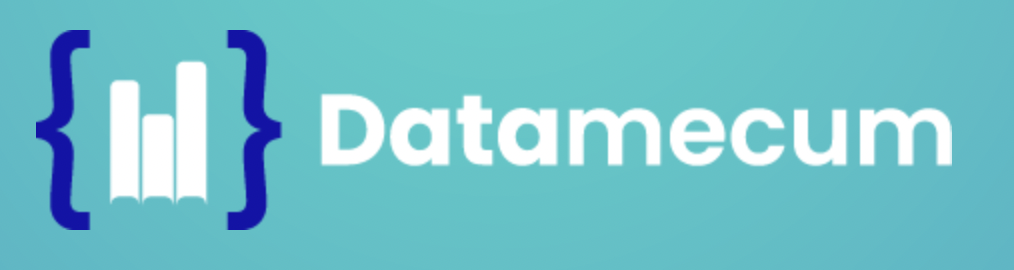
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Aprendizaje supervisado.</h2></font>
#### José María Martínez Martínez

## Ejemplo: clasificador de imágenes usando SKlearn

En esta sesión práctica realizaremos un ejemplo de clasificación en sklearn usando conjunto de datos *Fashion MNIST* el cual consta de 70,000 imágenes (las imágenes representan artículos de moda) en escala de grises de 28 × 28 píxeles cada una y con 10 clases.

### Uso de Keras para cargar el conjunto de datos

Comencemos cargando el conjunto de datos Fashion MNIST. Keras tiene una serie de funciones para cargar conjuntos de datos populares en keras.datasets. El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:






In [ ]:
from tensorflow import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

El conjunto de entrenamiento contiene 60,000 imágenes en escala de grises, cada una de 28x28 píxeles. Visualiza el tamaño del conjunto en la siguiente celda:

(60000, 28, 28)

La intensidad de cada píxel se representa como un byte (enteros entre 0 a 255):

dtype('uint8')

A continuación visualiza utilizando `matplotlib` el primer elemento del conjunto de entrenamiento (visualiza la matrix de valores) y comprueba el valor máximo y mínimo con una "*colorbar*". Además calcula de manera analítica los valores máximo y mínimo de la matriz.

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

0
255


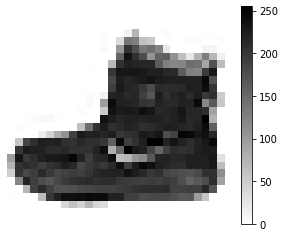

Ahora escalamos las intensidades de píxeles en el rango 0-1 y las convertimos en flotantes al dividiéndolas por 255. Para que el entrenamiento no dure mucho y se pueda ejecutar el código en lo que dura la sesión práctica, seleccionaremos las primeras 5000 muestras para el conjunto de entrenamiento:

(10000, 28, 28)
(60000, 28, 28)


Visualicemos de nuevo la primera imagen del conjunto de datos usando y calculemos el máximo y mínimo para comprobar que hemos escalado bién. Comprueba además que los datos son de tipo `float`

0.0
1.0
<class 'numpy.float64'>


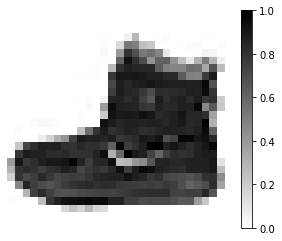

Las etiquetas van de 0 a 9, por lo que hay 10 tipos diferentes de ropa. Comprueba analitacamente que efectivamente, el vector `y_train` solamente tiene valores entre 0 y 9.

In [ ]:
import numpy as np

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Los nombres para cada una de las clases anteriores son:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por lo tanto, la clase 0 se corresponde con "T-shirt/top", la clase 1 con "Trouser" y así sucesivamente.

Comprueba que la primera imagen en el conjunto de entrenamiento es un abrigo (Coat)

'Ankle boot'

(10000, 28, 28)

visualicemos ahora algunas de las imágenes de los datos de entrenamiento con su respectiva etiqueta

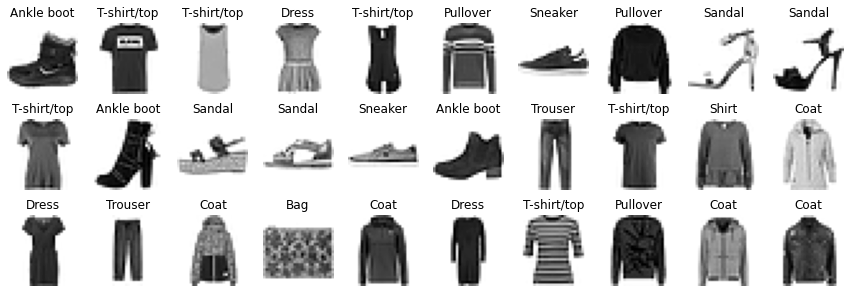

## Uso de Skalearn para crean un modelo de Classificador


Utiliza el módulo RandomizedSearchCV de sklearn.model_selection realizar un entrenamiento para cada combinación de parámetros que se describen a continuación y así encontrar el mejor modelo (la mejor combinación de parámetros). Para ello:

*   Varía los tamaños de las 2 capas ocultas entre 50 y 500 con incrementos de 100 teniendo en cuenta todas las combinaciones posibles
*   Prueba las funciones de activación 'logistic', 'tanh', 'relu'
*   Prueba todos los optimizadores posibles
*   Prueba un learning rate inicial constante que vaya de 0.001 a 0.01 (teniendo en cuenta solo 5 valores)
*   Deja el resto de parámetros constantes (`early_stopping` y `shuffle` igual a `True`)


Calcula la matriz de confusión sobre el conjunto de test para evaluar los resultados del clasificador, usando el módulo `metrics` de la librería `sklearn`. Dibuja en un plot dicha matriz utilizando el módulo `ConfusionMatrixDisplay`


Ahora haz un ajuste fino dado los mejores parámetros. Deja los valores discretos fijos, y ajusta en rangos más pequeños los numéricos para tener un ajuste más fino del modelo. Imprime por pantalla la mejor combinación de parámetros y el mejor score.

Best parameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (205, 195), 'activation': 'logistic'}
Best score: 0.49


## Usando el modelo para hacer predicciones

A continuación usa el mejor modelo y predice sobre el conjunto de test para para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del conjunto de test. Haz dos tipos de predicciones (usando diferentes métdodos del RandomizerSearchCV), la que te devuelve la etiqueta y la que te devuelve las probabilidades de pertenencia. Imprime por pantalla ambos resultados

[[0.11999679 0.11000074 0.09000247 0.1499949  0.09000396 0.11000161
  0.10000119 0.07999818 0.04000248 0.10999767]
 [0.11999679 0.11000074 0.09000248 0.14999491 0.09000396 0.11000161
  0.10000118 0.07999818 0.04000248 0.10999766]
 [0.11999679 0.11000074 0.09000248 0.1499949  0.09000395 0.11000162
  0.10000118 0.07999818 0.04000248 0.10999766]]
[3 3 3]


¿Cómo interpretas las salidas devueltas al predecir con ambos métodos? A continuación utiliza la función `np.argmax` y obtén la clase predicha mediante el vector `class_names` calculado anteriormente.



array([3, 3, 3])

array(['Dress', 'Dress', 'Dress'], dtype='<U11')

array([9, 2, 1], dtype=uint8)

Representa visualmente los datos de entrada para comprobar que las predicciones son correcta.

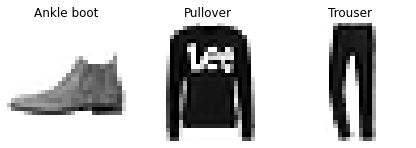